<img src="../../img/k_means.png" width="750" height="300">  
<img src="../../img/k_means_1.png" width="750" height="300">  

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

## Create dataset

In [11]:
# 25 ortalamaya,5 sigmaya sahip 1000 değer üret. 
# Verilen sigma değeri ile verinin 666 tanesi 20 ile 30 arasında(Gauss dağılımı) olacak.

# class1
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)

# class2
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

# class3
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

# concatenate --> birleştirmek --> x'ler ve y'ler tek bir sütunda toplandı.
x = np.concatenate((x1,x2,x3),axis = 0)
y = np.concatenate((y1,y2,y3),axis = 0)

# Bir sözlükte birleştirildi.
dictionary = {"x":x,"y":y}

data = pd.DataFrame(dictionary)

In [14]:
data

,x,y
0,14.590319,26.225943
1,33.483166,33.922313
2,27.072582,23.833421
3,23.297996,26.191926
4,25.435908,23.721421
...,...,...
2995,52.719510,17.163239
2996,54.812937,10.348013
2997,61.818456,19.884736
2998,45.596856,17.806371


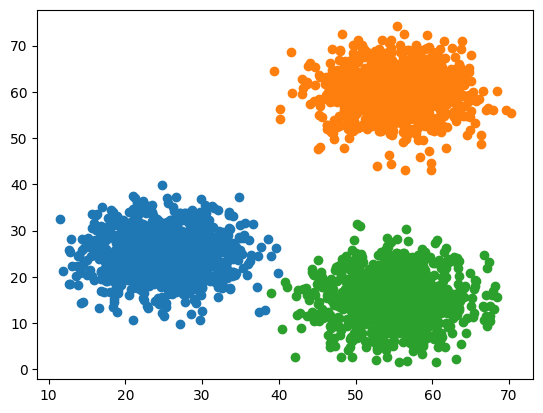

In [15]:
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()

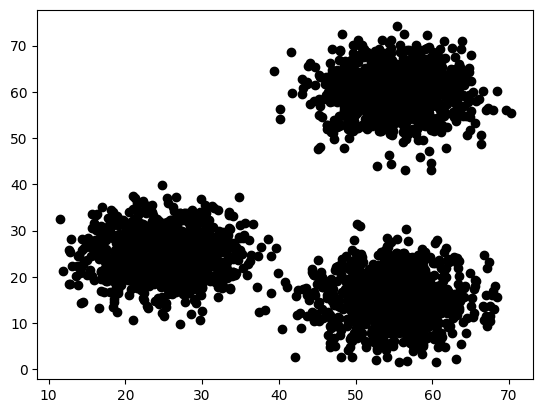

In [17]:
# k_means algoritması bunu görecek.
plt.scatter(x1,y1,color = "black")
plt.scatter(x2,y2,color = "black")
plt.scatter(x3,y3,color = "black")
plt.show()